In [203]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
import os

In [204]:
df = pd.read_csv(r"G:\Projects\Ground Water Level Estimator - Group Project\dataset\groundwater-DATASET.csv")


In [205]:
df.columns = df.columns.str.strip().str.lower()
print(df.columns.tolist())
df['date'] = pd.to_datetime(df['date'], errors='coerce')

['id', 'date', 'state_name', 'state_code', 'district_name', 'district_code', 'station_name', 'latitude', 'longitude', 'basin', 'sub_basin', 'source', 'currentlevel', 'level_diff']


In [206]:
df.head()

,id,date,state_name,state_code,district_name,district_code,station_name,latitude,longitude,basin,sub_basin,source,currentlevel,level_diff
0,0,2013-11-04,Andaman And Nicobar Islands,35,North And Middle Andaman,632,Laxmipur,13.28556,93.00306,Drainage Area Of Andaman And Nicobar Islands B...,Drainage Area Of Andaman And Nicobar Islands,CGWB,0.10,-1.03
1,1,2014-05-14,Andaman And Nicobar Islands,35,North And Middle Andaman,632,Laxmipur,13.28556,93.00306,Drainage Area Of Andaman And Nicobar Islands B...,Drainage Area Of Andaman And Nicobar Islands,CGWB,2.60,2.50
2,2,2014-11-04,Andaman And Nicobar Islands,35,North And Middle Andaman,632,Laxmipur,13.28556,93.00306,Drainage Area Of Andaman And Nicobar Islands B...,Drainage Area Of Andaman And Nicobar Islands,CGWB,0.35,-2.25
3,3,2015-05-14,Andaman And Nicobar Islands,35,North And Middle Andaman,632,Laxmipur,13.28556,93.00306,Drainage Area Of Andaman And Nicobar Islands B...,Drainage Area Of Andaman And Nicobar Islands,CGWB,2.52,2.17
4,4,2015-11-04,Andaman And Nicobar Islands,35,North And Middle Andaman,632,Laxmipur,13.28556,93.00306,Drainage Area Of Andaman And Nicobar Islands B...,Drainage Area Of Andaman And Nicobar Islands,CGWB,0.69,-1.83


In [207]:
df.describe()

,id,date,state_code,district_code,latitude,longitude,currentlevel,level_diff
count,550850.000000,550850,550850.000000,550850.000000,550850.000000,550850.000000,550850.000000,550850.000000
mean,275424.500000,2016-12-10 10:55:51.878732544,22.550522,396.961078,20.156235,79.304912,8.515535,0.015445
min,0.000000,2013-01-01 00:00:00,1.000000,1.000000,8.083330,68.675000,0.000000,-276.580000
25%,137712.250000,2014-11-06 00:00:00,19.000000,312.000000,14.916670,75.993060,2.900000,-1.300000
50%,275424.500000,2016-11-04 00:00:00,23.000000,433.000000,21.347500,78.166670,5.450000,0.300000
75%,413136.750000,2018-11-07 00:00:00,29.000000,535.000000,24.470560,82.237500,9.650000,1.550000
max,550849.000000,2023-03-31 00:00:00,38.000000,704.000000,33.741110,96.133330,299.300000,253.510000
std,159016.842229,NaN,9.200259,169.397554,6.202342,4.766219,10.717358,5.773125


In [208]:
df.nunique()

id               550850
date               3715
state_name           32
state_code           32
district_name       565
district_code       567
station_name      23078
latitude          16272
longitude         15098
basin                23
sub_basin            90
source                1
currentlevel       7845
level_diff         5897
dtype: int64

In [209]:
df.isnull().sum()

id               0
date             0
state_name       0
state_code       0
district_name    0
district_code    0
station_name     0
latitude         0
longitude        0
basin            0
sub_basin        0
source           0
currentlevel     0
level_diff       0
dtype: int64

C:\Users\Neelaksh\AppData\Local\Temp\ipykernel_8644\3080642106.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=district_avg.head(30), y='district_name', x='currentlevel', palette='viridis')


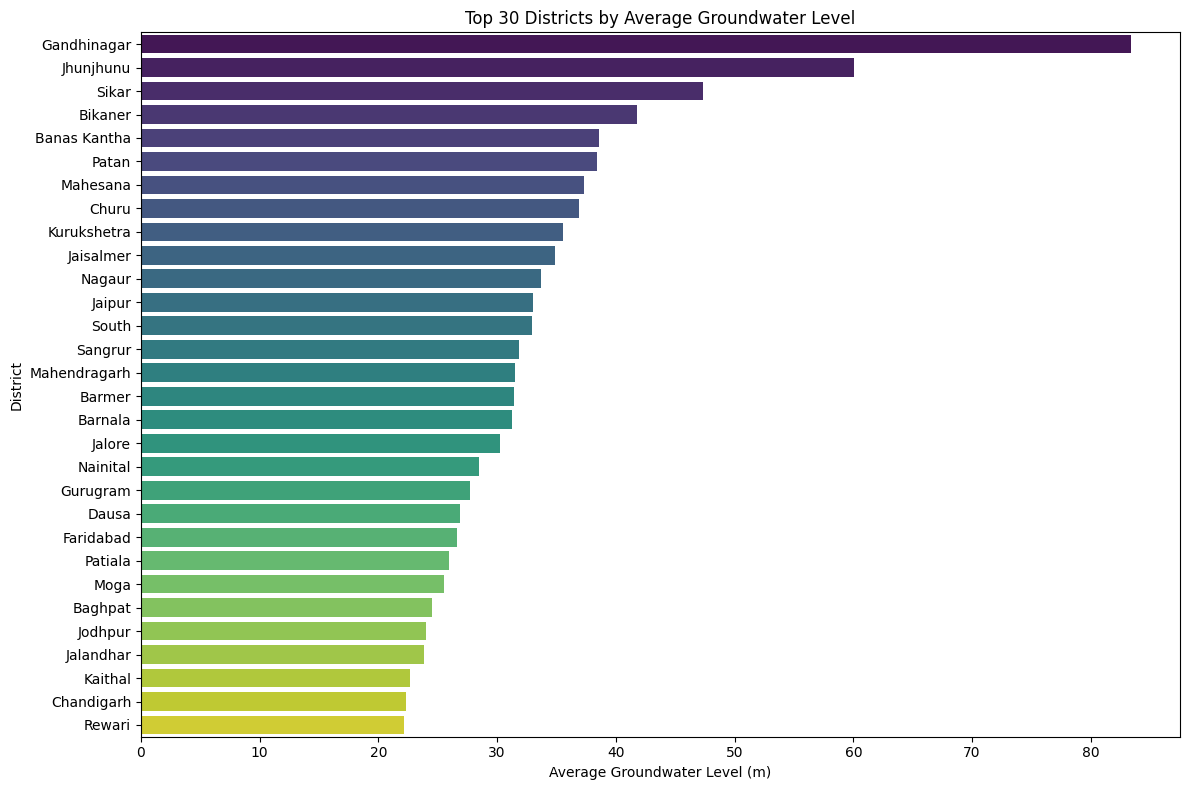

In [210]:
district_avg = df.groupby('district_name')['currentlevel'].mean().sort_values(ascending=False).reset_index()
plt.figure(figsize=(12, 8))
sns.barplot(data=district_avg.head(30), y='district_name', x='currentlevel', palette='viridis')
plt.title('Top 30 Districts by Average Groundwater Level')
plt.xlabel('Average Groundwater Level (m)')
plt.ylabel('District')
plt.tight_layout()
plt.show()

C:\Users\Neelaksh\AppData\Local\Temp\ipykernel_8644\2798706979.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=district_avg.head(32), y='state_name', x='currentlevel', palette='viridis')


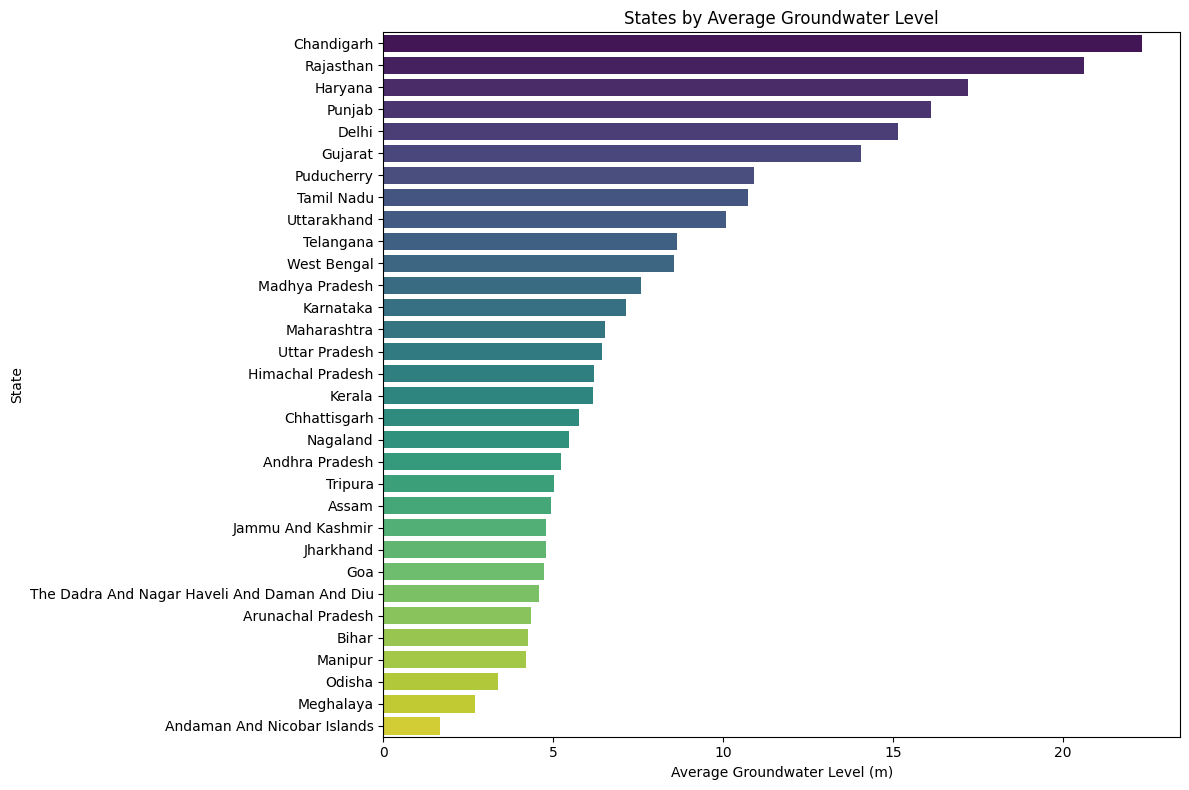

In [211]:
district_avg = df.groupby('state_name')['currentlevel'].mean().sort_values(ascending=False).reset_index()
plt.figure(figsize=(12, 8))
sns.barplot(data=district_avg.head(32), y='state_name', x='currentlevel', palette='viridis')
plt.title('States by Average Groundwater Level')
plt.xlabel('Average Groundwater Level (m)')
plt.ylabel('State')
plt.tight_layout()
plt.show()

C:\Users\Neelaksh\AppData\Local\Temp\ipykernel_8644\2788724021.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=season_avg, x='season', y='currentlevel', order=['Winter', 'Summer', 'Monsoon', 'Post-Monsoon'], palette='viridis')


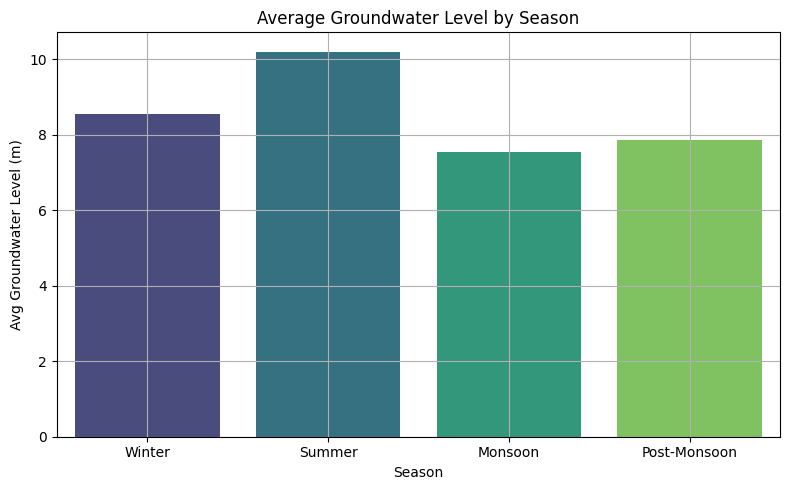

In [212]:
df= df.dropna(subset=['date', 'currentlevel'])
df['month'] = df['date'].dt.month
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Summer'
    elif month in [6, 7, 8]:
        return 'Monsoon'
    else:
        return 'Post-Monsoon'

df['season'] = df['month'].apply(get_season)
season_avg = df.groupby('season')['currentlevel'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=season_avg, x='season', y='currentlevel', order=['Winter', 'Summer', 'Monsoon', 'Post-Monsoon'], palette='viridis')
plt.title('Average Groundwater Level by Season')
plt.xlabel('Season')
plt.ylabel('Avg Groundwater Level (m)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [213]:
df.columns = df.columns.str.strip().str.lower()
df_sorted = df.sort_values(by='currentlevel')

print("Top 10 Shallowest Water Levels:")
print(df_sorted.head(10)[['district_name', 'state_name', 'station_name', 'currentlevel', 'date']])

print("\n Top 10 Deepest Water Levels:")
print(df_sorted.tail(10)[['district_name', 'state_name', 'station_name', 'currentlevel', 'date']])


Top 10 Shallowest Water Levels:
       district_name      state_name     station_name  currentlevel       date
66534      Sambalpur          Odisha       Babubandha           0.0 2019-01-09
508878        Ujjain  Madhya Pradesh    Delchi buzurg           0.0 2019-08-11
15803        Purulia     West Bengal        Dangardi3           0.0 2018-05-19
544748     Ahmedabad         Gujarat        Viramgam2           0.0 2020-08-24
32954        Birbhum     West Bengal           Ganpur           0.0 2019-08-01
533262      Junagadh         Gujarat        Junagadh1           0.0 2020-08-24
206549           Mau   Uttar Pradesh            Ghosi           0.0 2020-08-24
441252       Khammam       Telangana  Nayakangudem-PZ           0.0 2019-01-04
485003        Ratlam  Madhya Pradesh          Dhodhar           0.0 2019-08-04
176605      Chittoor  Andhra Pradesh  Karvetinagar-PZ           0.0 2021-01-09

 Top 10 Deepest Water Levels:
       district_name  state_name  station_name  currentlevel       d

C:\Users\Neelaksh\AppData\Local\Temp\ipykernel_8644\2331596438.py:15: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
g:\Projects\Ground Water Level Estimator - Group Project\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


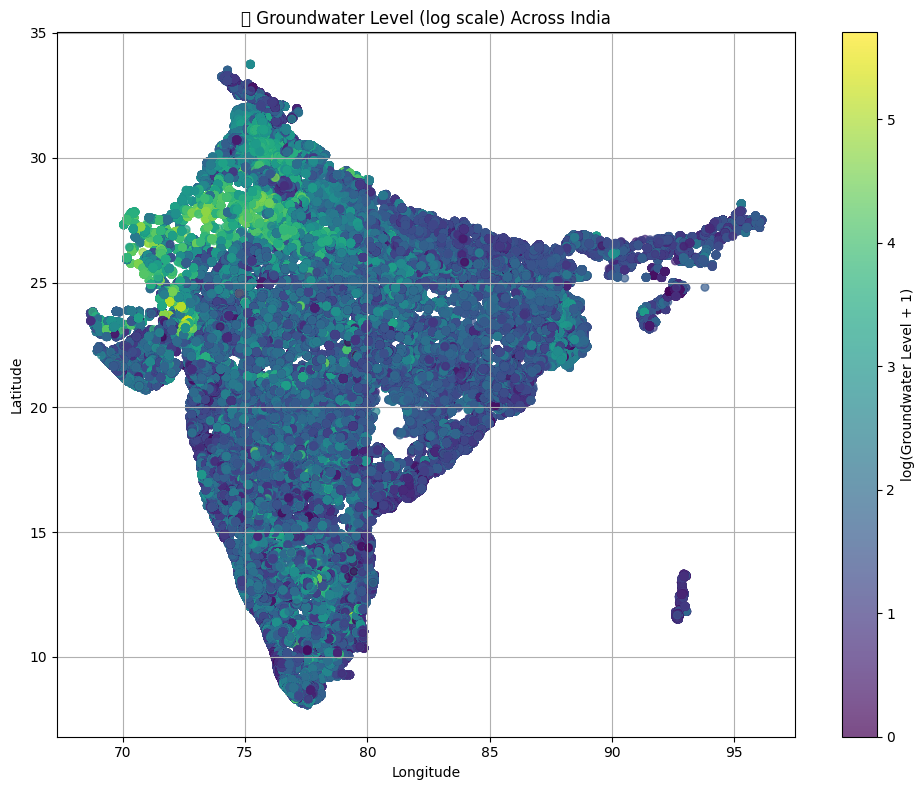

In [214]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    df['longitude'],
    df['latitude'],
    c=numpy.log1p(df['currentlevel']),  # log transform
    cmap='viridis',
    s=30, alpha=0.7
)

plt.colorbar(scatter, label='log(Groundwater Level + 1)')
plt.title('📍 Groundwater Level (log scale) Across India')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.tight_layout()
plt.show()

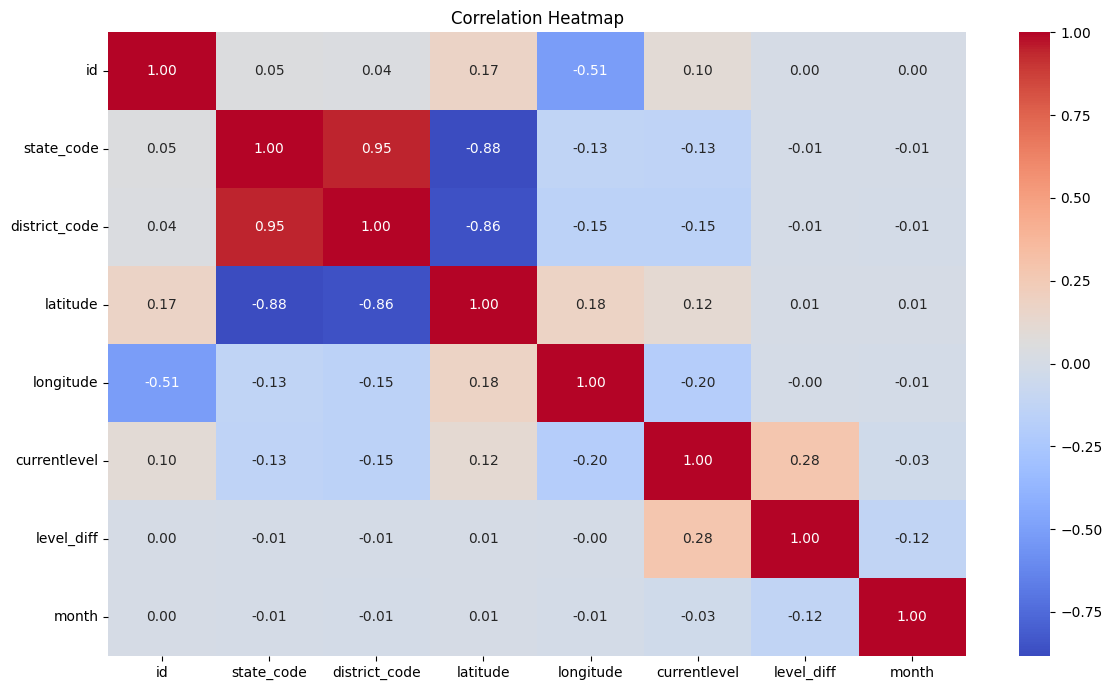

In [215]:
df_numeric = df.select_dtypes(include=['number'])

plt.figure(figsize=(12, 7))
sns.heatmap(df_numeric.corr(), cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

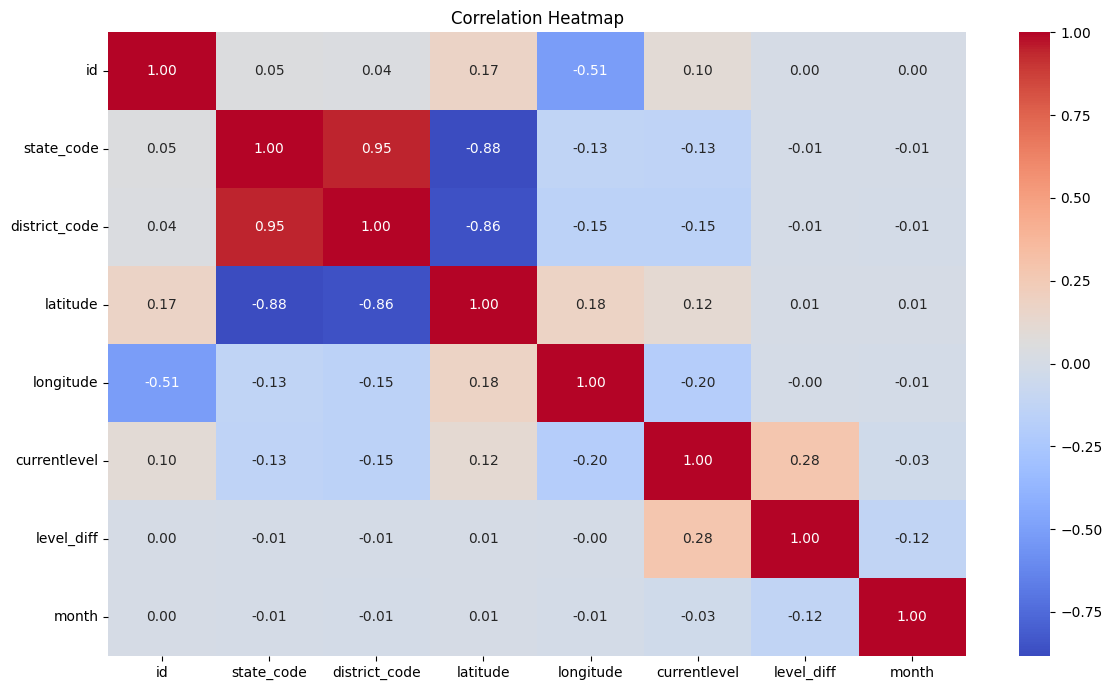

In [216]:
df_numeric = df.select_dtypes(include=['number'])

plt.figure(figsize=(12, 7))
sns.heatmap(df_numeric.corr(), cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

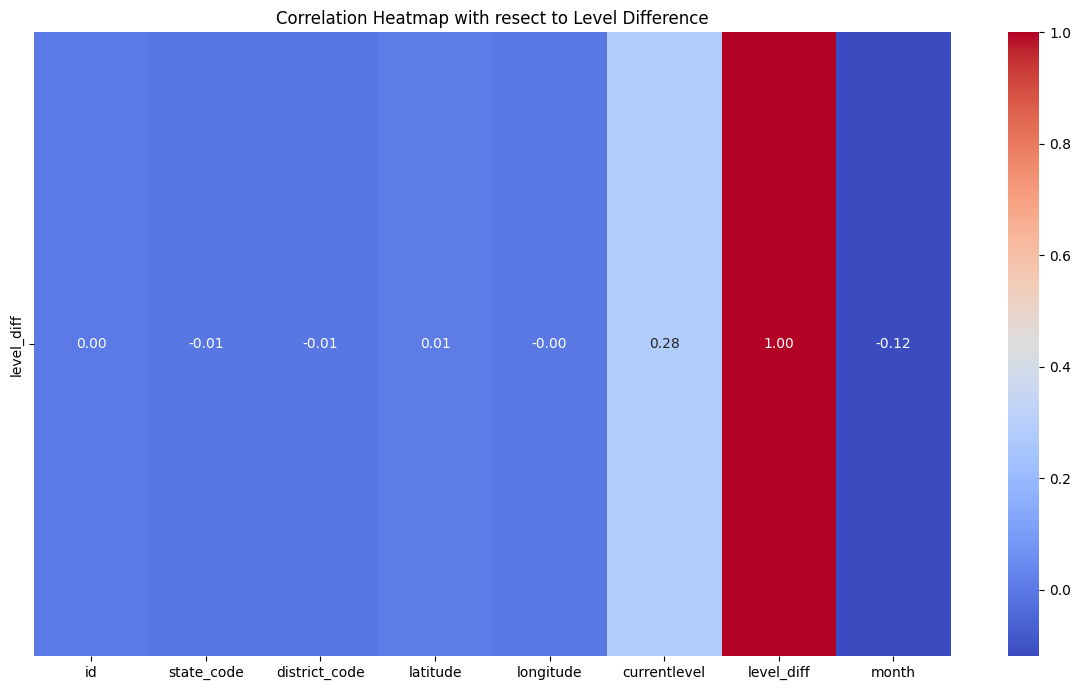

In [217]:
plt.figure(figsize=(12, 7))
sns.heatmap(df_numeric.corr().loc[['level_diff'],:], cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Correlation Heatmap with resect to Level Difference")
plt.tight_layout()
plt.show()

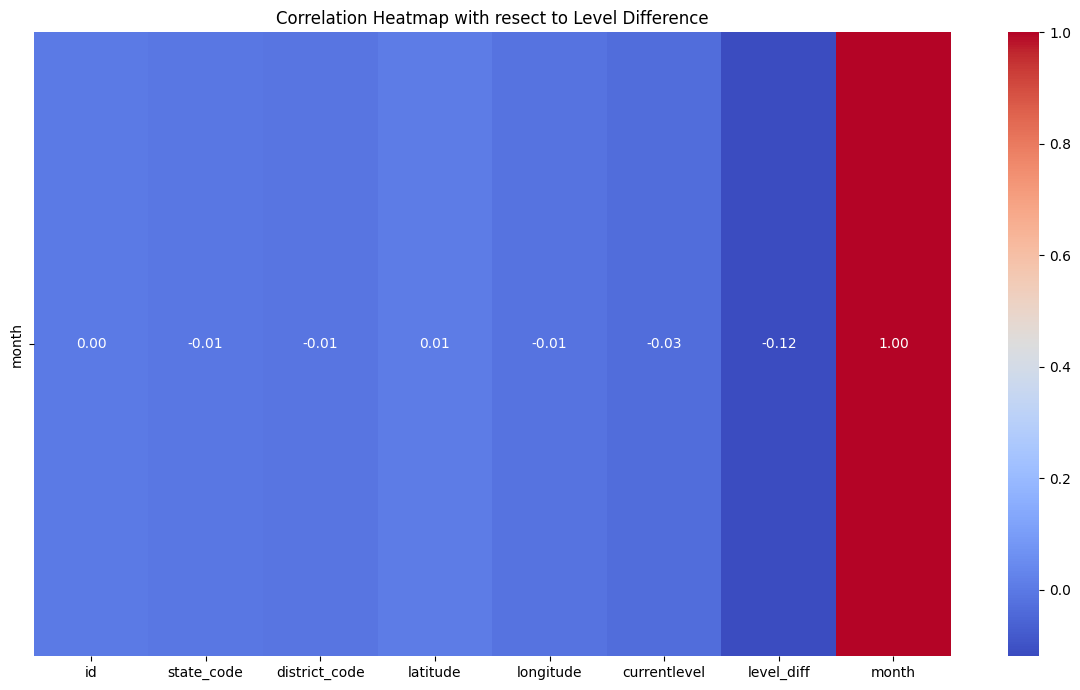

In [218]:
plt.figure(figsize=(12, 7))
sns.heatmap(df_numeric.corr().loc[['month'],:], cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Correlation Heatmap with resect to Level Difference")
plt.tight_layout()
plt.show()

In [219]:
df['season'] = df['month'].apply(get_season)

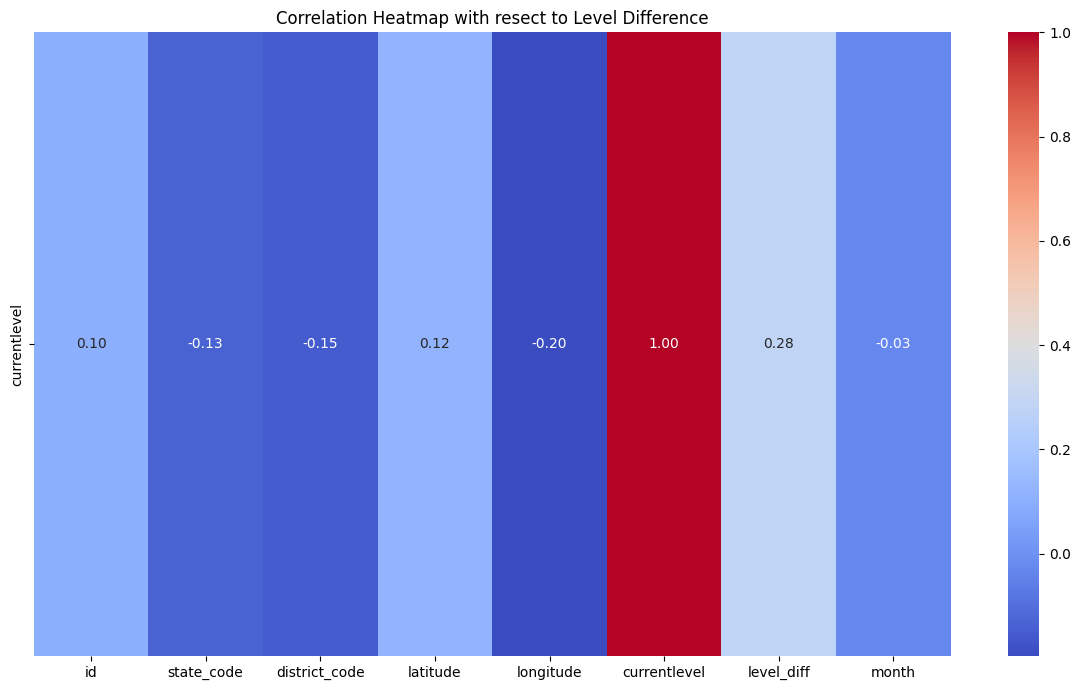

In [220]:
plt.figure(figsize=(12, 7))
sns.heatmap(df_numeric.corr().loc[['currentlevel'],:], cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Correlation Heatmap with resect to Level Difference")
plt.tight_layout()
plt.show()

In [221]:
# Creating a true copy to edit features
df_copy=df.copy()

In [222]:
df_copy.drop(columns=['district_name','state_name','station_name','date','id','source'],inplace=True)
df_copy.head()

,state_code,district_code,latitude,longitude,basin,sub_basin,currentlevel,level_diff,month,season
0,35,632,13.28556,93.00306,Drainage Area Of Andaman And Nicobar Islands B...,Drainage Area Of Andaman And Nicobar Islands,0.10,-1.03,11,Post-Monsoon
1,35,632,13.28556,93.00306,Drainage Area Of Andaman And Nicobar Islands B...,Drainage Area Of Andaman And Nicobar Islands,2.60,2.50,5,Summer
2,35,632,13.28556,93.00306,Drainage Area Of Andaman And Nicobar Islands B...,Drainage Area Of Andaman And Nicobar Islands,0.35,-2.25,11,Post-Monsoon
3,35,632,13.28556,93.00306,Drainage Area Of Andaman And Nicobar Islands B...,Drainage Area Of Andaman And Nicobar Islands,2.52,2.17,5,Summer
4,35,632,13.28556,93.00306,Drainage Area Of Andaman And Nicobar Islands B...,Drainage Area Of Andaman And Nicobar Islands,0.69,-1.83,11,Post-Monsoon


In [223]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550850 entries, 0 to 550849
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   state_code     550850 non-null  int64  
 1   district_code  550850 non-null  int64  
 2   latitude       550850 non-null  float64
 3   longitude      550850 non-null  float64
 4   basin          550850 non-null  object 
 5   sub_basin      550850 non-null  object 
 6   currentlevel   550850 non-null  float64
 7   level_diff     550850 non-null  float64
 8   month          550850 non-null  int32  
 9   season         550850 non-null  object 
dtypes: float64(4), int32(1), int64(2), object(3)
memory usage: 39.9+ MB


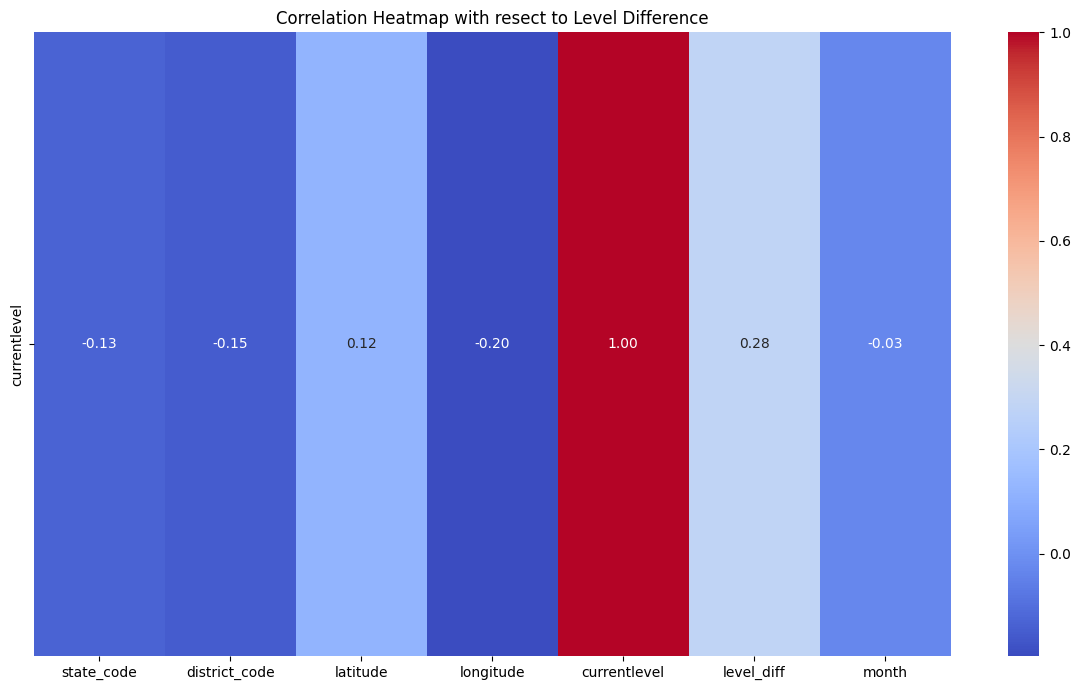

In [224]:
# Making a heat map of the dataframe
df_numeric = df_copy.select_dtypes(exclude='O')
plt.figure(figsize=(12, 7))
sns.heatmap(df_numeric.corr().loc[['currentlevel'],:], cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Correlation Heatmap with resect to Level Difference")
plt.tight_layout()
plt.show()

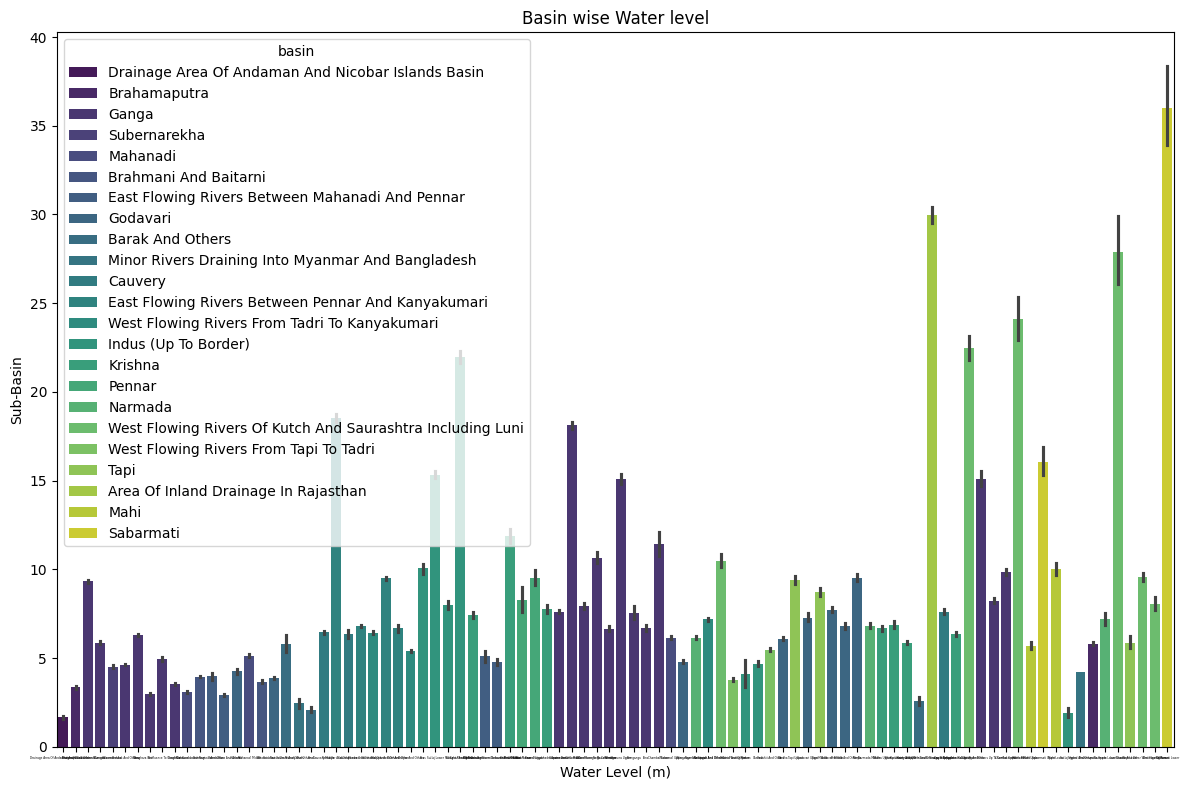

In [225]:
plt.figure(figsize=(12, 8))
sns.barplot(data=df_copy, x='sub_basin', y='currentlevel', hue='basin', palette='viridis')
plt.title('Basin wise Water level')
plt.xlabel('Water Level (m)')
plt.ylabel('Sub-Basin')
plt.xticks(size=2)
plt.tight_layout()
plt.show()

In [226]:
ohe=OneHotEncoder()
onehotencoded=ohe.fit_transform(df_copy[['season']])
season_columns = ohe.get_feature_names_out(['season'])

In [227]:
df_seasons = pd.DataFrame(onehotencoded.toarray(), columns=season_columns)
df_copy = pd.concat([df_copy, df_seasons], axis=1)
df_copy.head()

,state_code,district_code,latitude,longitude,basin,sub_basin,currentlevel,level_diff,month,season,season_Monsoon,season_Post-Monsoon,season_Summer,season_Winter
0,35,632,13.28556,93.00306,Drainage Area Of Andaman And Nicobar Islands B...,Drainage Area Of Andaman And Nicobar Islands,0.10,-1.03,11,Post-Monsoon,0.0,1.0,0.0,0.0
1,35,632,13.28556,93.00306,Drainage Area Of Andaman And Nicobar Islands B...,Drainage Area Of Andaman And Nicobar Islands,2.60,2.50,5,Summer,0.0,0.0,1.0,0.0
2,35,632,13.28556,93.00306,Drainage Area Of Andaman And Nicobar Islands B...,Drainage Area Of Andaman And Nicobar Islands,0.35,-2.25,11,Post-Monsoon,0.0,1.0,0.0,0.0
3,35,632,13.28556,93.00306,Drainage Area Of Andaman And Nicobar Islands B...,Drainage Area Of Andaman And Nicobar Islands,2.52,2.17,5,Summer,0.0,0.0,1.0,0.0
4,35,632,13.28556,93.00306,Drainage Area Of Andaman And Nicobar Islands B...,Drainage Area Of Andaman And Nicobar Islands,0.69,-1.83,11,Post-Monsoon,0.0,1.0,0.0,0.0


In [228]:
df_copy.columns

Index(['state_code', 'district_code', 'latitude', 'longitude', 'basin',
       'sub_basin', 'currentlevel', 'level_diff', 'month', 'season',
       'season_Monsoon', 'season_Post-Monsoon', 'season_Summer',
       'season_Winter'],
      dtype='object')

In [229]:
# Seprating Independent and Dependent Features
x = df_copy[['state_code', 'district_code', 'latitude', 'longitude', 'basin',
       'sub_basin', 'level_diff', 'month', 'season_Monsoon', 'season_Post-Monsoon', 'season_Summer',
       'season_Winter']]     # Independent Feature

y = df_copy['currentlevel']  # Dependent Feature

In [230]:
# Train Test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [231]:
x_train.shape,x_test.shape

((440680, 12), (110170, 12))

In [232]:
# Get the project root (2 levels up from notebooks/)
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Build the full path to dataset/cleanedData
save_dir = os.path.join(project_root, "dataset", "cleanedData")
os.makedirs(save_dir, exist_ok=True)

# Save files
x_train.to_csv(os.path.join(save_dir, 'x_train.csv'), index=False)
x_test.to_csv(os.path.join(save_dir, 'x_test.csv'), index=False)
y_train.to_csv(os.path.join(save_dir, 'y_train.csv'), index=False)
y_test.to_csv(os.path.join(save_dir, 'y_test.csv'), index=False)

print("Files saved to:", save_dir)

Files saved to: g:\Projects\Ground Water Level Estimator - Group Project\dataset\cleanedData
